# 1.1
Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [20]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge,RidgeCV

In [21]:
df=pd.read_csv("Hitters.csv",index_col=0)
df=df.dropna()
df=df.drop(columns=['League','Division','NewLeague'])

In [22]:
salary=df['Salary']
data=df.drop(['Salary'],axis=1)

In [23]:
n=200
a = 10**np.linspace(-2,10,n)

In [24]:
coeff = []
for i in a:
    lasso=Lasso(alpha = i,max_iter = 5000, normalize = True)
    lasso.fit(data, salary)
    coeff.append(lasso.coef_)

Text(0, 0.5, 'Coefficients')

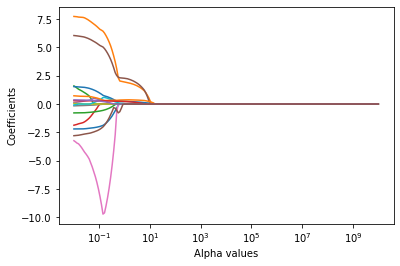

In [25]:
fig = plt.gca()
fig.plot(a, coeff)
fig.set_xscale('log')
plt.xlabel('Alpha values')
plt.ylabel('Coefficients')

when alpha goes to 10^1, the coefficients approach to 0.

In [26]:
lasso= Lasso(alpha =10, max_iter=5000, normalize =True)
lasso.fit(data,salary)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=5000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [27]:
coef = pd.Series(lasso.coef_,index = data.columns)
print(coef)

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


In [28]:
lasso_cv = LassoCV(cv=10,max_iter = 5000,normalize = True)
lasso_cv.fit(data,salary)
alpha = lasso_cv.alpha_
alpha

0.0635481759985745

In [29]:
n = np.sum(lasso_cv.coef_ != 0)
n

14

In [30]:
lasso_model = Lasso(alpha = alpha,max_iter = 5000, normalize = True)
lasso_model.fit(data,salary)


Lasso(alpha=0.0635481759985745, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
pd.Series(lasso_model.coef_, index=data.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

In [32]:

print('result is',np.sum(lasso_model.coef_ != 0)) 

result is 14


# 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use crossvalidation to find the optimal vaule of the regularization penalty.

In [33]:
coeff = []
for i in a:
    ridge=Ridge(alpha = i,max_iter = 5000, normalize = True)
    ridge.fit(data, salary)
    coeff.append(ridge.coef_)

Text(0, 0.5, 'Coefficients')

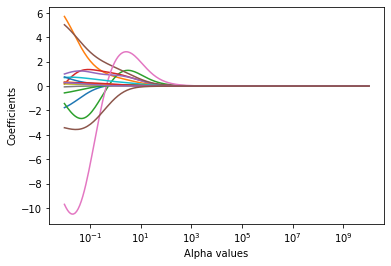

In [34]:
fig = plt.gca()
fig.plot(a, coeff)
fig.set_xscale('log')
plt.xlabel('Alpha values')
plt.ylabel('Coefficients')

In [35]:
ridge_cv = RidgeCV(alphas = a, scoring = 'neg_mean_squared_error', normalize = True)
ridge_cv.fit(data,salary)
print('result is', ridge_cv.alpha_)

result is 0.011489510001873092


# Short Answer.
## Explain in your own words the bias-variance tradeoff. 

Decrease bias by increaing variance and vice versa

## What role does regularization play in this tradeoff? 

regularization can prevent overfitting by set coefficients to zero and decrease the number of predictors. Therefore the bias would be increasing and variance decreasing.

## Make reference to your findings in number (1) to describe models of high/low bias and variance.

increase of alpha   ->   bias increase, variance decrease

decrease of alpha   ->   bias decrease, variance increase